<span style="color: #ff6900; font-size: 45px; font-weight: bold;">Achieving Fashionable Accuracy: Hyperparameter Tuning in Fashion MNIST</span>
<br>

<p style="font-size: 20px; margin-bottom: 5%;"><i>Lena Hammerer, Luisa Ibele, Isabel Janez, Judith Romer, Hanna Steinwender</i></p>
<br>
<br>
<table style="border-collapse: collapse; border: none; width: 100%; margin-left: 0; padding-left: 0;">
  <tr style="border: none;">
    <td style="border: none; width: 8%; font-size: 18px;"><b>Lecture</b></td>
    <td style="border: none; font-size: 18px;">Aktuelle Data Science Entwicklungen</td>
  </tr>
  <tr style="border: none;  background-color: white;">
    <td style="border: none; font-size: 18px;"><b>Lecturer</b></td>
    <td style="border: none; font-size: 18px;">Prof. Dr. Martin Zaefferer</td>
  </tr>
  <tr>
    <td style="border: none;"></td>
    <td style="border: none; text-align: right; font-size: 18px;">06.09.2023</td>
</table>

<div style="display: flex; justify-content: space-between; align-items: center; width: 100%;">
    <span style="color: #ff6900; font-size: 40px; font-weight: bold;">Procedure</span>
    <span style="text-align: right; font-size: 12px;">Isabel Janez | Judith Romer</span>
</div>
<br>
<img src="images/crisp-dm.png" width="650px">
<footer style="font-size: 10px;">
<p>[1] https://www.kobold.ai/crisp-dm/ </p>

<div style="display: flex; justify-content: space-between; align-items: center; width: 100%;">
    <span style="color: #ff6900; font-size: 40px; font-weight: bold;">Business Understanding</span>
    <span style="text-align: right; font-size: 12px;">Isabel Janez | Judith Romer</span>
</div>
<p style="font-size: 18px;"><i>Discussing and Understanding the Use Case</i></p>

<span style="color: #ff6900; font-size: 35px; font-weight: bold;">Goal of the Hyperparameter Tuning Project</span>

- Chosen problem from the field of Machine Learning (dataset, model, parameters)
- Solve the problem, with empirical investigation, using the approaches from the lecture 

<span style="color: #ff6900; font-size: 35px; font-weight: bold;">Dataset: Fashion-MNIST</span>

<ul>
  <li>Image dataset for benchmarking machine learning algorithms</li>
  <li>Drop-in replacement of MNIST dataset</li>
  <li>Dataset based on Zalando's product diversity for men, women, children and neutral</li>
  <li>Contains article images with labels of 10 classes:<br>
  <table style="width: 20%; float: left; background-color: white; margin-bottom: 1%;">
    <tr>
      <td style="border: none;">1. T-shirt/top</td>
    </tr>
    <tr>
      <td style="border: none; background-color: white;">2. Trouser</td>
    </tr>
    <tr>
      <td style="border: none;">3. Pullover</td>
    </tr>
    <tr>
      <td style="border: none; background-color: white;">4. Dress</td>
    </tr>
    <tr>
      <td style="border: none;">5. Coat</td>
    </tr>
  </table>

  <table style="width: 80%; float: left; background-color: white; margin-bottom: 1%;">
    <tr>
      <td style="border: none;">6. Sandal</td>
    </tr>
    <tr>
      <td style="border: none; background-color: white;">7. Shirt</td>
    </tr>
    <tr>
      <td style="border: none;">8. Sneaker</td>
    </tr>
    <tr>
      <td style="border: none; background-color: white;">9. Bag</td>
    </tr>
    <tr>
      <td style="border: none;">10. Ankle Boot</td>
    </tr>
  </table>
  </li>
  <li>Training set of 60.000 examples and test set of 10.000 examples</li>
  <li>Each example is a 28x28 grayscale image</li>
  <li>Simple structure allows basic testing of algorithms</li>
  <li>Image formats:</li>
  <ul>
    <li>No white products due to low contrast to background</li>
    <li>Images in different resolutions for frontend components</li>
  </ul>
</ul>

<br>
<footer style="font-size: 10px;">
<p>[1] Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. arXiv: cs.LG/1708.07747 </p>

<p style="color: #ff6900; font-weight: bold; font-size: 25px;">Why was the Fashion-MNIST dataset created?</p>

- original MNIST dataset: lot of handwritten digits
- MNIST is often used as benchmark to validate algorithms
- MNIST is to easy, overused and can not present modern Computer Vision tasks
- Fashion-MNIST intended to serve as a direct drop-in replacement, sharing same images size and the structure of training and testing splits

<br>
<p style="color: #ff6900; font-weight: bold; font-size: 25px;">The aim of Fashion-MNIST dataset</p>

- Good benchmark dataset
- Accessibility of MNIST: small size, straightforward encoding and permissive license
- A more challenging classification task

<br>

<footer style="font-size: 10px;">
<p>[1] Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. arXiv: cs.LG/1708.07747 </p>

In [3]:
%load_ext autoreload
%autoreload 2

from src.eda import EDA
eda = EDA()

<div style="display: flex; justify-content: space-between; align-items: center; width: 100%;">
    <span style="color: #ff6900; font-size: 25px; font-weight: bold;">Overview of the Dataset</span>
    <span style="text-align: right; font-size: 12px;">Isabel Janez | Judith Romer</span>
</div>

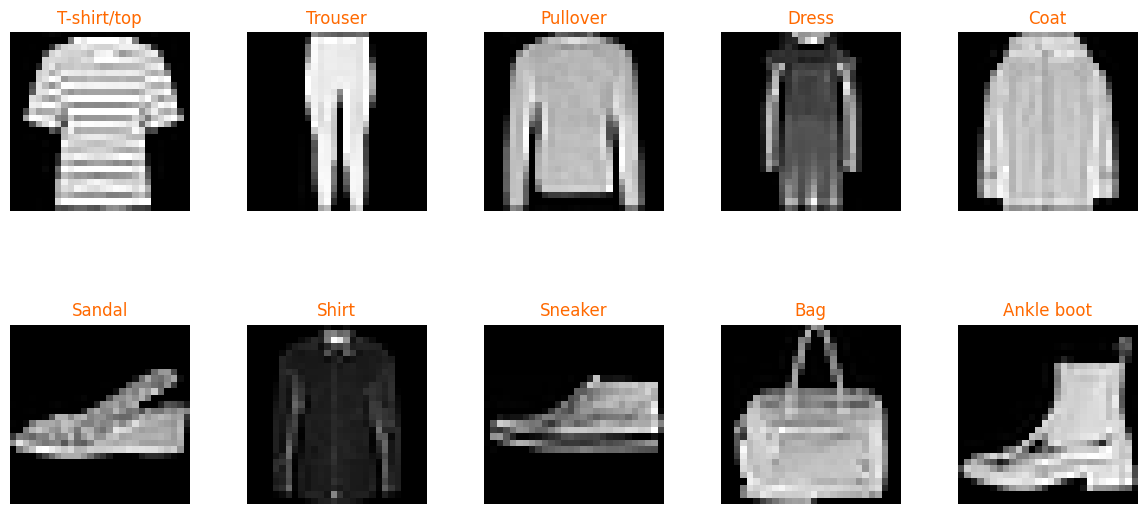

In [4]:
eda.display_random_images()

zu erwähnen:
- Größe Datensatz
- beispielhafte Bilder
- wie Aufbau von Datensatz
- Balance der Klassen
- Pixel Angaben nennen

<div style="display: flex; justify-content: space-between; align-items: center; width: 100%;">
    <span style="color: #ff6900; font-size: 40px; font-weight: bold;">Data Understanding</span>
    <span style="text-align: right; font-size: 12px;">Isabel Janez | Judith Romer</span>
</div>
<p style="font-size: 18px;"><i>Identification and Exploratory Analysis of Appropriate Data</i></p>

In [4]:
trainset, testset = eda.load_data()

<div style="display: flex; justify-content: space-between; align-items: center; width: 100%;">
    <span style="color: #ff6900; font-size: 35px; font-weight: bold;">Class Distribution</span>
    <span style="text-align: right; font-size: 12px;">Isabel Janez | Judith Romer</span>
</div>

In [52]:
eda.plot_class_distribution(trainset, testset)

<div style="display: flex; justify-content: space-between; align-items: center; width: 100%;">
    <span style="color: #ff6900; font-size: 35px; font-weight: bold;">Average Black Pixels</span>
    <span style="text-align: right; font-size: 12px;">Isabel Janez | Judith Romer</span>
</div>

In [49]:
eda.display_average_black_pixels(trainset, testset)

<div style="display: flex; justify-content: space-between; align-items: center; width: 100%;">
    <span style="color: #ff6900; font-size: 40px; font-weight: bold;">Data Preparation</span>
    <span style="text-align: right; font-size: 12px;">Isabel Janez | Judith Romer</span>
</div>
<p style="font-size: 18px;"><i>Consolidation and Cleaning of Data, Feature Engineering</i></p><br>

- Balanced Dataset
- Limited Resources
- Clean Dataset
- Prioritizing Simplicity and Speed

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import random_split

In [ ]:
# Split the training set into subsets
test_abs = int(len(trainset) * 0.8)
train_subset, val_subset = random_split(trainset, [test_abs, len(trainset) - test_abs])

# Create data loaders for subsets
trainloader = torch.utils.data.DataLoader(
    train_subset, batch_size=64, shuffle=True, num_workers=2
)
valloader = torch.utils.data.DataLoader(
    val_subset, batch_size=64, shuffle=True, num_workers=2
)

<div style="display: flex; justify-content: space-between; align-items: center; width: 100%;">
    <span style="color: #ff6900; font-size: 40px; font-weight: bold;">Modeling</span>
    <span style="text-align: right; font-size: 12px;">Isabel Janez | Judith Romer</span>
</div>
<p style="font-size: 18px;"><i>Use of Machine Learning or other Data Mining Algorithms</i></p><br>

maybe short agenda? looking at which metrics / architecture / parameters? 

<div style="display: flex; justify-content: space-between; align-items: center; width: 100%;">
    <span style="color: #ff6900; font-size: 35px; font-weight: bold;">Metrics</span>
    <span style="text-align: right; font-size: 12px;">Isabel Janez | Judith Romer</span>
</div>
<p style="color: #ff6900; font-weight: bold; font-size: 25px;">Accuracy</p>

- Measures the proportion of correctly classified data
- Accuracy = (Correctly classified instances/total number of instances) * 100
- Simple interpretation - especially for balanced class distribution

<p style="color: #ff6900; font-weight: bold; font-size: 25px;">Cross Entropy</p>

- Measure of the differences between probability distributions
- Minimisation leads to approximation of model predictions to true class distributions
- Promotes high probabilities for true classes and low probabilities for false classes

<div style="display: flex; justify-content: space-between; align-items: center; width: 100%;">
    <span style="color: #ff6900; font-size: 35px; font-weight: bold;">Architecture</span>
    <span style="text-align: right; font-size: 12px;">Isabel Janez | Judith Romer</span>
</div>
<p style="color: #ff6900; font-weight: bold; font-size: 25px">Convolutional Neural Network (CNN)</p><br>
<img src="images/architecture.png" width="100%">

<p style="font-weight: bold; font-size: 20px;">Why use a CNN to train ML models on the Fashion-MNIST dataset?</p>

- CNN: fully connected feed forward neural network
- Trained to identify the edges of objects in any image
- Can process large amounts of data and produce highly accurate predictions
- Can learn the features of an object through multiple iterations, eliminating the need for manual feature engineering tasks like feature extraction
- Very effective in reducing the number of parameters without losing on the quality of models, which makes it suitable for handling images because of their high dimensionality
- Plays an important role in classification of images and image segmentation due to its great performance in different problems

<br>
<footer style="font-size: 10px;">
<p>[1] Meshkini, K., Platos, J. and Ghassemain, H., 2020. An analysis of convolutional neural network for fashion images classification (fashion-mnist). In Proceedings of the Fourth International Scientific Conference “Intelligent Information Technologies for Industry”(IITI’19) 4 (pp. 85-95). Springer International Publishing.<br>
[2] M. Kayed, A. Anter and H. Mohamed, "Classification of Garments from Fashion MNIST Dataset Using CNN LeNet-5 Architecture," 2020 International Conference on Innovative Trends in Communication and Computer Engineering (ITCE), Aswan, Egypt, 2020, pp. 238-243, doi: 10.1109/ITCE48509.2020.9047776.<br>
[3] Mishra, Prafful (2019): Why are Convolutional Neural Networks good for image classification? In: DataDrivenInvestor (27.05.2019) - URL https://medium.datadriveninvestor.com/why-are-convolutional-neural-networks-good-for-image-classification-146ec6e865e8, Accessed: 31.08.2023.</p>

<div style="display: flex; justify-content: space-between; align-items: center; width: 100%;">
    <span style="color: #ff6900; font-size: 35px; font-weight: bold;">Hyperparameters</span>
    <span style="text-align: right; font-size: 12px;">Isabel Janez | Judith Romer</span>
</div>
<p style="color: #ff6900; font-weight: bold; font-size: 25px">Learing Rate</p>

- Affects weight updates after each training step
- Too low learning rate: slow convergence
- Too high learning rate: divergence
- Optimal learning rate: fast convergence with few iterations
- Controls loss gradient backtracking during weight updates.
- Adaptive methods adjust learning rate based on accuracy or gradient
- Non-adaptive methods use constant or stepwise learning rate schedules
- Cyclic learning rate: varies cyclically between predefined thresholds
- Goal: Better balance between accuracy and loss

<br>
<footer style="font-size: 10px;">
<p>Johny, A. and Madhusoodanan, K.N., 2021. Dynamic learning rate in deep CNN model for metastasis detection and classification of histopathology images. Computational and Mathematical Methods in Medicine, 2021, pp.1-13.</p>

<p style="color: #ff6900; font-weight: bold; font-size: 25px">Epochs</p>

- Defines number of runs of the learning algorithm over the entire training dataset
- Each example in the dataset is given an opportunity to update the model parameters
- Includes one or more batches
- One run over the whole dataset is organised in epochs
- Large number of epochs contributes to convergence and minimisation of model error

<br>
<footer style="font-size: 10px;">
<p>Brownlee, J., 2018. What is the Difference Between a Batch and an Epoch in a Neural Network. Machine Learning Mastery, 20.</p>

<p style="color: #ff6900; font-weight: bold; font-size: 25px">Batch Size</p>

- Subset of the training data set that is used simultaneously for weight updating.
- Several batches are run sequentially within an epoch
- Smaller batch sizes can lead to increased noise in training
- Larger batch sizes require more memory and processing power
- Selection of optimal batch size requires trade-off between noise and resources.
- Batches enable parallel weight updates in training
- Batch size influences noise and resource requirements in training

<br>
<footer style="font-size: 10px;">
<p>Brownlee, J., 2018. What is the Difference Between a Batch and an Epoch in a Neural Network. Machine Learning Mastery, 20.</p>

<p style="color: #ff6900; font-weight: bold; font-size: 25px">L1 Architecture Parameter (Neurons of the first Linear Layer)</p>

<ul>
    <li>Tuning the linear, fully connected layers of the CNN</li>
    <li>Significant impact on the network's performance</li>
    <li>Linear layers are typically responsible for making final predictions or decisions</li>
    <li>Benefits:</li>
    <ul>
        <li>improved model performance</li>
        <li>reducing overfitting</li>
        <li>controlling model complexity</li>
    </ul>
</ul>

<p style="color: #ff6900; font-weight: bold; font-size: 25px">What is Neural Architecture Search (NAS) vs. Classic Hyperparameter Tuning</p>

<span style="font-weight: bold; font-size: 20px;">NAS:</span>

- automated process of discovering the optimal neural network architecture for a specific machine learning task
- usage of search algorithms to explore a predefined search space of possible architectures and find the one that performs best on a given dataset and task

<br>
<span style="font-weight: bold; font-size: 20px;">Classic Hyperparameter Tuning:</span>

- the process of systematically searching for the best hyperparameters for a machine learning model, typically after a fixed model architecture has been chosen
- settings that control aspects of the model's training and behavior but are not learned from the data
- more the focus of this project, tuning on parameters: learning rate, epochs, batch size

<br>
<footer style="font-size: 10px;">
<p>[1] White, C., Safari, M., Sukthanker, R., Ru, B., Elsken, T., Zela, A., Dey, D. and Hutter, F., 2023. Neural architecture search: Insights from 1000 papers. arXiv preprint arXiv:2301.08727.<br>
[2] Tuba, E., Bačanin, N., Strumberger, I. and Tuba, M., 2021. Convolutional neural networks hyperparameters tuning. In Artificial intelligence: theory and applications (pp. 65-84). Cham: Springer International Publishing.<br>
[3] Bartz, E., Bartz-Beielstein, T., Zaefferer, M. and Mersmann, O., 2023. Hyperparameter Tuning for Machine and Deep Learning with R: A Practical Guide (p. 323). Springer Nature.</p>

<p style="color: #ff6900; font-weight: bold; font-size: 25px">Further Parameters</p>

- Dropout
- Optimizer
- Activation function
- Architecture

<br>
<footer style="font-size: 10px;">
<p>[1] Bartz, E., Bartz-Beielstein, T., Zaefferer, M. and Mersmann, O., 2023. Hyperparameter Tuning for Machine and Deep Learning with R: A Practical Guide (p. 323). Springer Nature.</p>

zu erwähnen:
- warum die Parameter nicht in Erwägung gezogen wurden

<div style="display: flex; justify-content: space-between; align-items: center; width: 100%;">
    <span style="color: #ff6900; font-size: 40px; font-weight: bold;">Evaluation</span>
    <span style="text-align: right; font-size: 12px;">Lena Hammerer | Luisa Ibele | Hanna Steinwender</span>
</div>
<p style="font-size: 18px;"><i>Verification of Predictive Accuracy and Coverage of the Use Case</i></p>

<div style="display: flex; justify-content: space-between; align-items: center; width: 100%;">
    <span style="color: #ff6900; font-size: 40px; font-weight: bold;">Conclusion</span>
    <span style="text-align: right; font-size: 12px;">Lena Hammerer | Luisa Ibele | Hanna Steinwender</span>
</div>
<p style="font-size: 18px;"><i>Providing a Summary and Key Takeaways, as well as offering Insights and Recommendations for Future Work</i></p>

<ul>
    <li>Fazit: learning rate sehr empfindlich</li>
    <li>Smapling der Werte für Tuning</li>
    <li>Ausblick: Optimizer, Dropout nicht angeschaut etc.</li>
</ul>

<span style="color: #ff6900; font-size: 40px; font-weight: bold;">References</span>
<ul style="font-size: 12px;">
    <li>Bartz, E., Bartz-Beielstein, T., Zaefferer, M. and Mersmann, O., 2023. Hyperparameter Tuning for Machine and Deep Learning with R: A Practical Guide (p. 323). Springer Nature.</li>
    <li>Brownlee, J., 2018. What is the Difference Between a Batch and an Epoch in a Neural Network. Machine Learning Mastery, 20.</li>
    <li>Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. arXiv: cs.LG/1708.07747</li>
    <li>M. Kayed, A. Anter and H. Mohamed, "Classification of Garments from Fashion MNIST Dataset Using CNN LeNet-5 Architecture," 2020 International Conference on Innovative Trends in Communication and Computer Engineering (ITCE), Aswan, Egypt, 2020, pp. 238-243, doi: 10.1109/ITCE48509.2020.9047776.</li>
    <li>Meshkini, K., Platos, J. and Ghassemain, H., 2020. An analysis of convolutional neural network for fashion images classification (fashion-mnist). In Proceedings of the Fourth International Scientific Conference “Intelligent Information Technologies for Industry”(IITI’19) 4 (pp. 85-95). Springer International Publishing.</li>
    <li>Mishra, Prafful (2019): Why are Convolutional Neural Networks good for image classification? In: DataDrivenInvestor (27.05.2019) - URL https://medium.datadriveninvestor.com/why-are-convolutional-neural-networks-good-for-image-classification-146ec6e865e8, Accessed: 31.08.2023.</li>
    <li>Tuba, E., Bačanin, N., Strumberger, I. and Tuba, M., 2021. Convolutional neural networks hyperparameters tuning. In Artificial intelligence: theory and applications (pp. 65-84). Cham: Springer International Publishing.</li>
    <li>White, C., Safari, M., Sukthanker, R., Ru, B., Elsken, T., Zela, A., Dey, D. and Hutter, F., 2023. Neural architecture search: Insights from 1000 papers. arXiv preprint arXiv:2301.08727.</li>
</ul>